#Key Findings
1. Female patients took more appointments then male patients
2. Ratio of Noshow and Show is almost equal for age group except Age 0 and Age 1 with 80 percent show rate for each age group
3. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
4. there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
5. there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
6. there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit. 
7. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days

In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#Reading my dataset
data_set = pd.read_csv('appointments_data.csv')

In [3]:
data_set

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
#dispaying total rows and column
data_set.shape

(110527, 14)

In [5]:
#Overview of the dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Converting the ScheduledDay and AppointmentDay column from object data type to datetime format
data_set['ScheduledDay'] = pd.to_datetime(data_set['ScheduledDay']).dt.date.astype('datetime64[ns]')
data_set['AppointmentDay'] = pd.to_datetime(data_set['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
data_set.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#Creating a new column that shows the day of the week for each date
#Monday = 0 while Sunday = 6

data_set['weekday_sch'] = data_set['ScheduledDay'].dt.dayofweek
data_set['weekday_app'] = data_set['AppointmentDay'].dt.dayofweek

In [9]:
data_set['weekday_sch'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: weekday_sch, dtype: int64

In [10]:
data_set['weekday_app'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: weekday_app, dtype: int64

In [11]:
#The inference above is that most  of the appointment is weekdays. No appointment for sundays and few for saturday
#There is a trend of increase during monday to wednesday

In [12]:
#Displaying the columns
data_set.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'weekday_sch', 'weekday_app'],
      dtype='object')

In [13]:
#Correcting spelling mistake
data_set= data_set.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [14]:
data_set.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'weekday_sch', 'weekday_app'],
      dtype='object')

In [15]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  weekday_sch     110527 non-null  int

In [16]:
#dropping someunimportant columns
data_set.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [17]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  weekday_sch     110527 non-null  int64         
 12  weekday_app     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [18]:
#Using decribe to delive some statistical values
data_set.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,weekday_sch,weekday_app
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


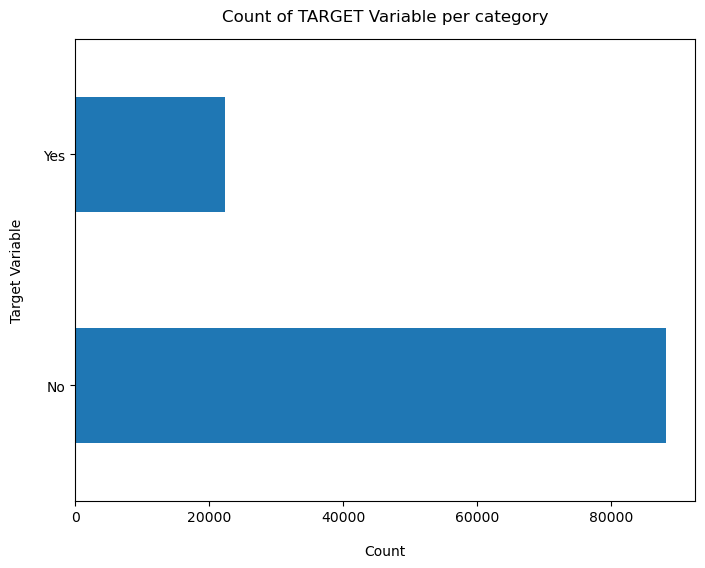

In [19]:
#Ploting the Target variable(NO Show) to show the distribution between the different variables 
data_set['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [20]:
# calculating the percentage of misssed appointments 
100*data_set['NoShow'].value_counts()/len(data_set['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [21]:
data_set['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [22]:
#Data Set Cleaning

In [23]:
#Creating a copy of data set
new_dataset = data_set.copy() 

In [24]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  weekday_sch     110527 non-null  int64         
 12  weekday_app     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [25]:
#Finfing missing values
missing = pd.DataFrame((data_set.isnull().sum())*100/data_set.shape[0]).reset_index()
missing

,index,0
0,Gender,0.0
1,ScheduledDay,0.0
2,AppointmentDay,0.0
3,Age,0.0
4,Scholarship,0.0
5,Hypertension,0.0
6,Diabetes,0.0
7,Alcoholism,0.0
8,Handicap,0.0
9,SMSReceived,0.0


In [26]:
#No missing data

In [27]:
#getting maximun age
print(data_set['Age'].max())

115


In [28]:
#group age range in bin of 12months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

data_set['age_group'] = pd.cut(data_set.Age, range(1, 130, 20), right=False, labels=labels)

In [29]:
data_set.drop(['Age'], axis=1, inplace=True)

In [30]:
#Data Exploration

In [31]:
list(data_set.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'weekday_sch',
 'weekday_app',
 'age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

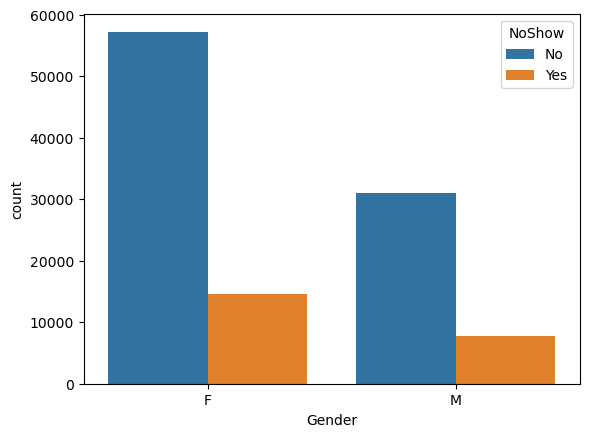

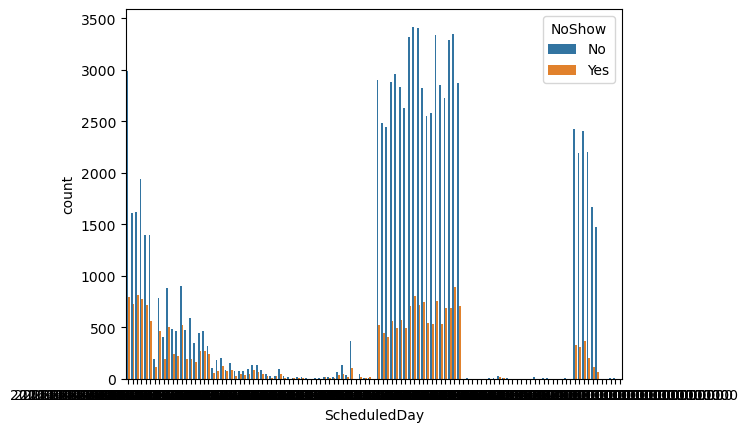

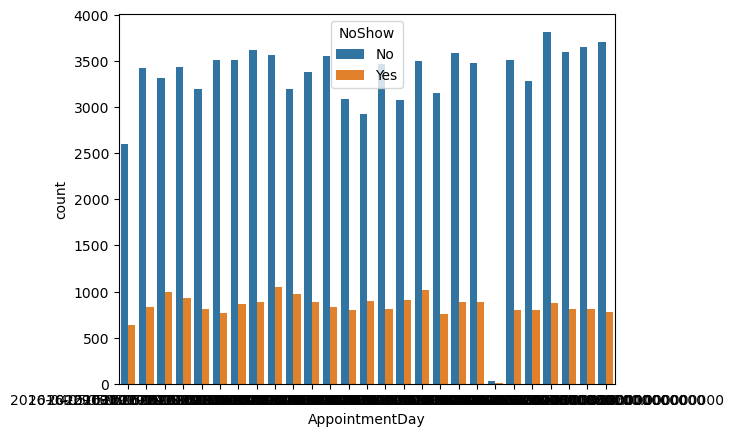

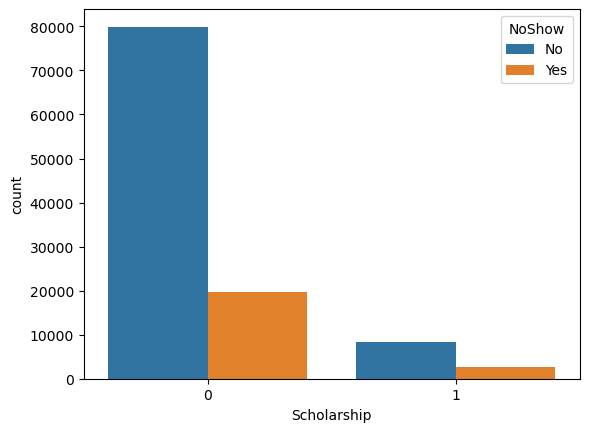

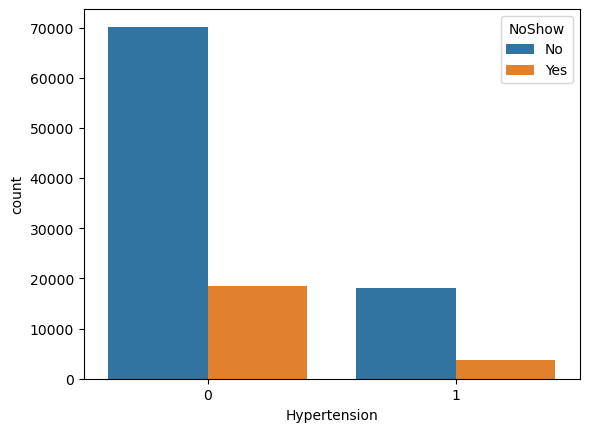

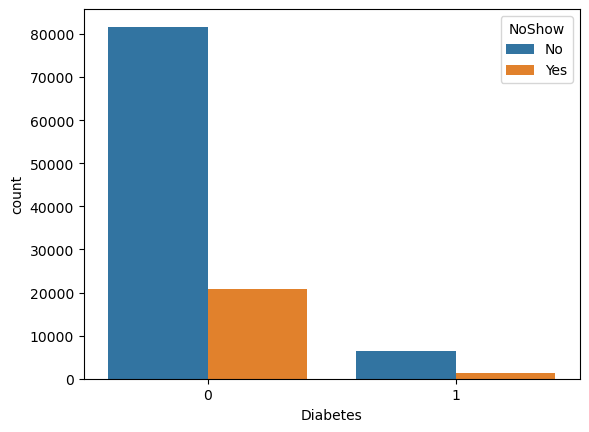

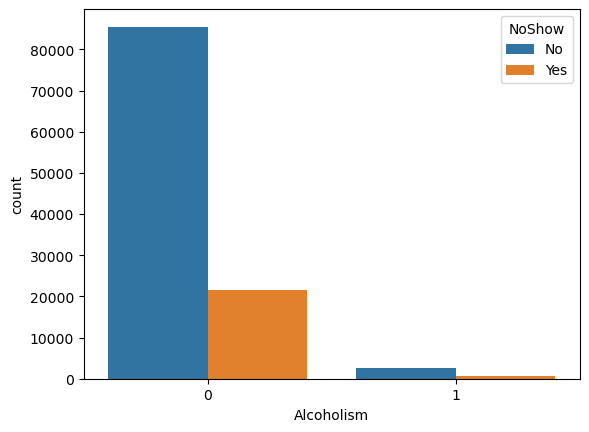

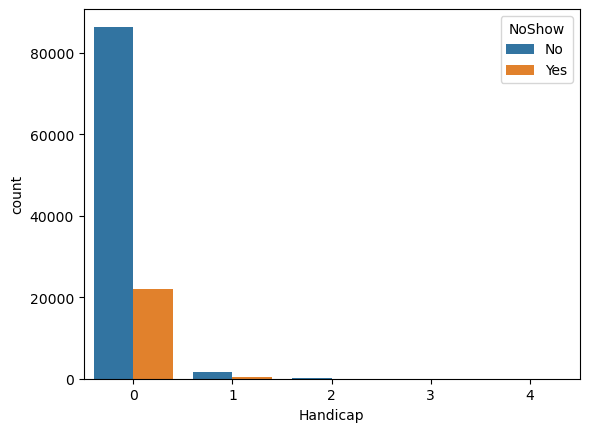

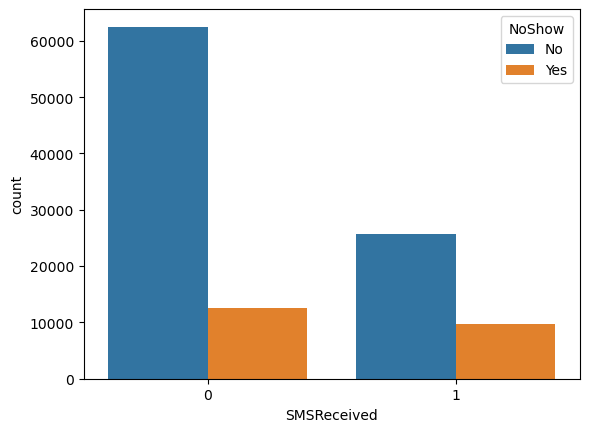

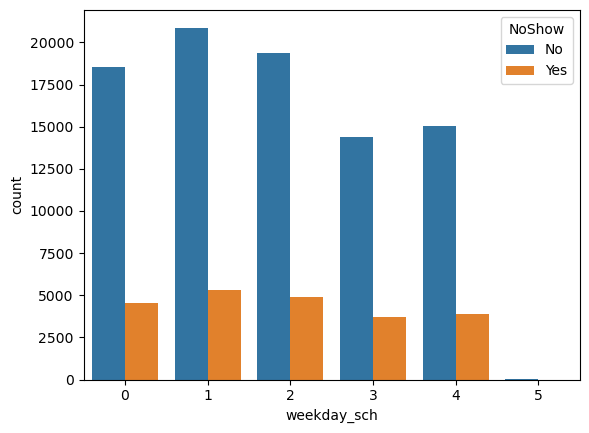

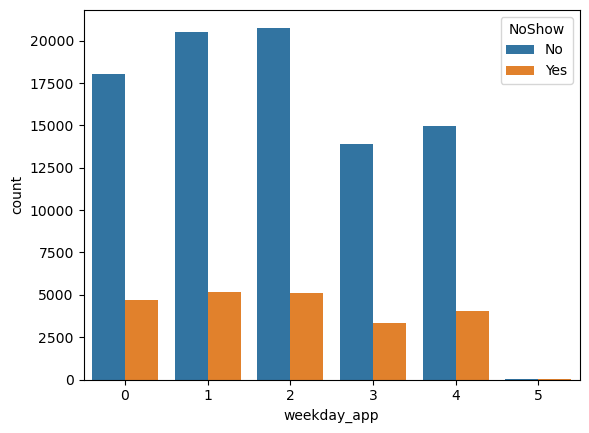

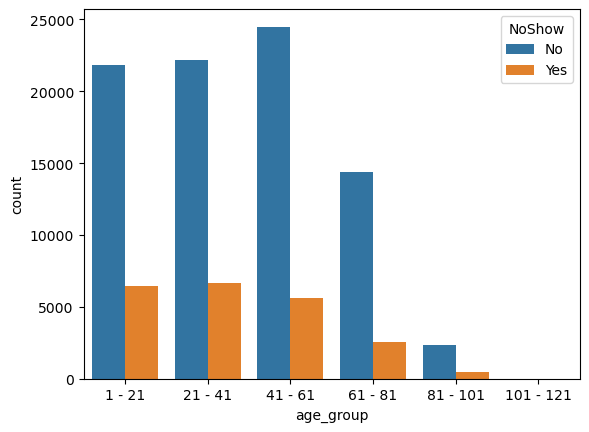

In [32]:
#Display the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(data_set.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(data_set[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=data_set, x=predictor, hue='NoShow')

In [33]:
#Converting the no show variables to 1 and 0
data_set['NoShow'] = np.where(data_set.NoShow == 'Yes',1,0)

In [34]:
data_set.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [35]:
#Converting all the categorical variables into dummy variables
data_set_dummies = pd.get_dummies(data_set)
data_set_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,weekday_sch,weekday_app,Gender_F,Gender_M,age_group_1 - 21,age_group_21 - 41,age_group_41 - 61,age_group_61 - 81,age_group_81 - 101,age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


C:\Users\User\AppData\Local\Temp\ipykernel_1128\4164186402.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_set_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

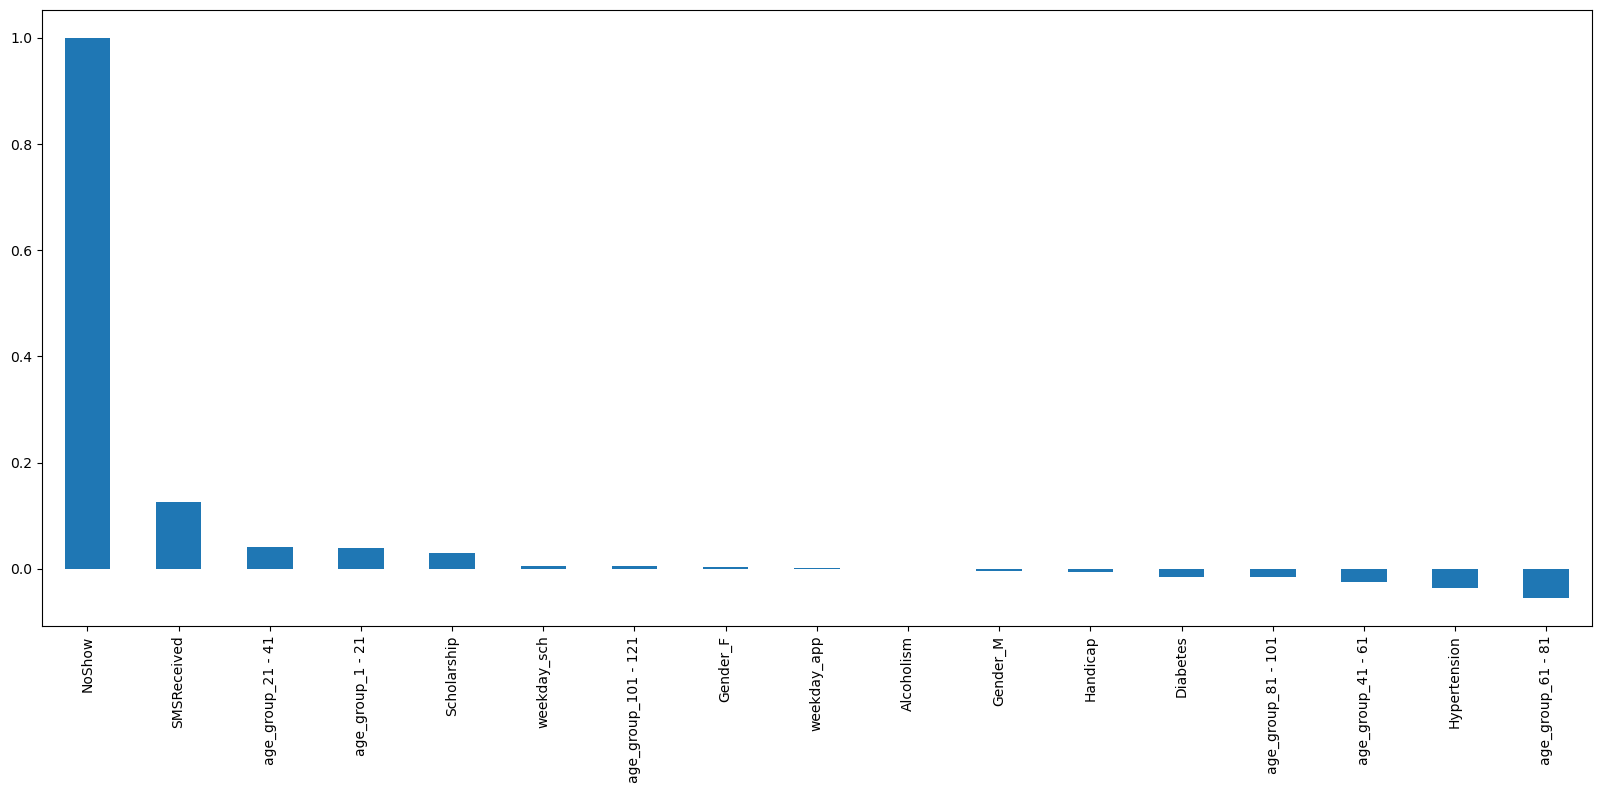

In [37]:
#Create a corelation of all predictors with 'NoShow'
plt.figure(figsize=(20,8))
data_set_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

C:\Users\User\AppData\Local\Temp\ipykernel_1128\4218288174.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_set_dummies.corr(), cmap="Paired")


<Axes: >

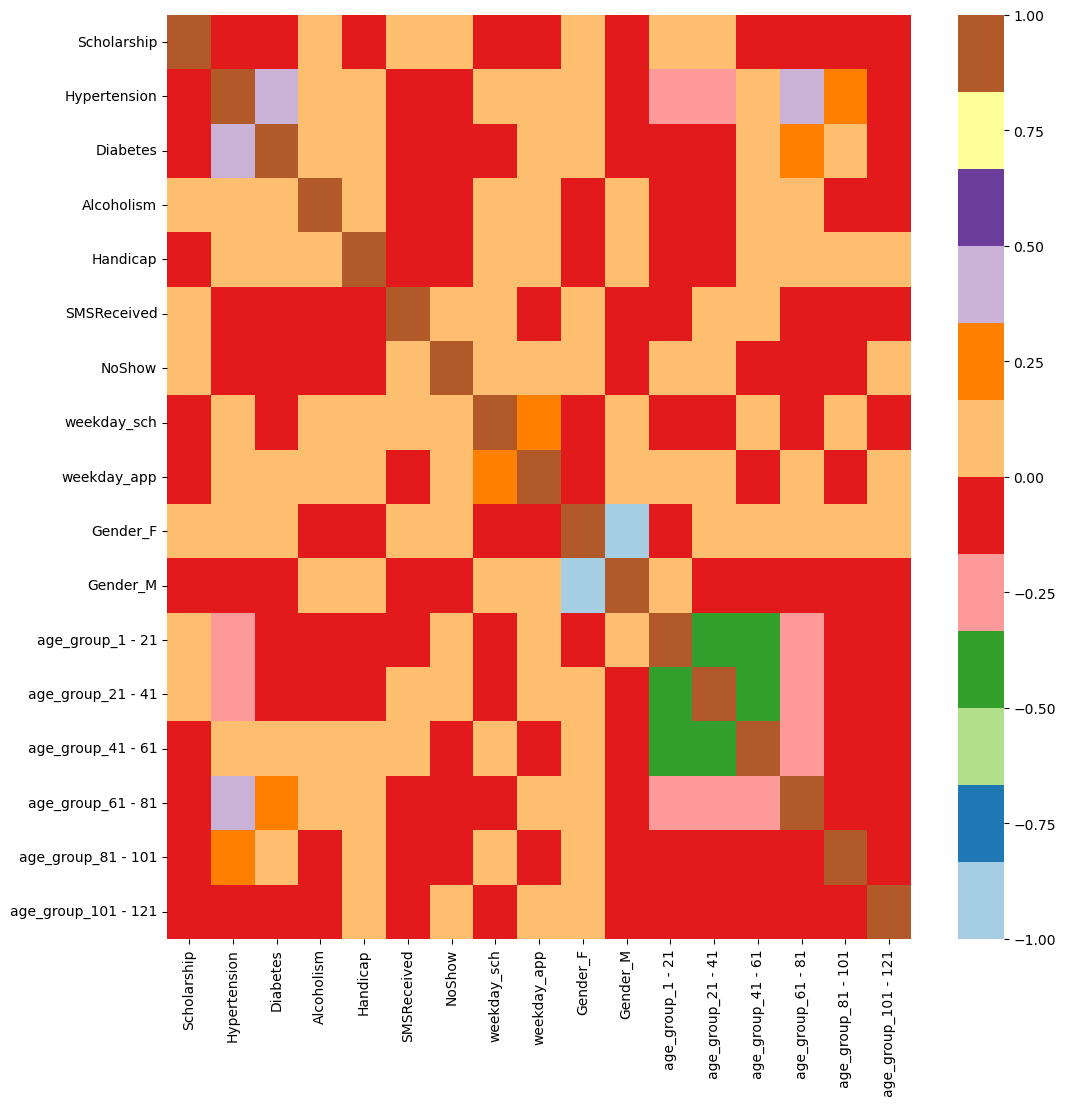

In [38]:
#Ploting a heatmap of the correlation function
plt.figure(figsize=(12,12))
sns.heatmap(data_set_dummies.corr(), cmap="Paired")

In [39]:
#Categorical/Bivariant Analysis

In [40]:
new_df1_target0=data_set.loc[data_set["NoShow"]==0] #For no show 0 - Attend appointment
new_df1_target1=data_set.loc[data_set["NoShow"]==1] #For no show 1 - Missed appointment

In [41]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

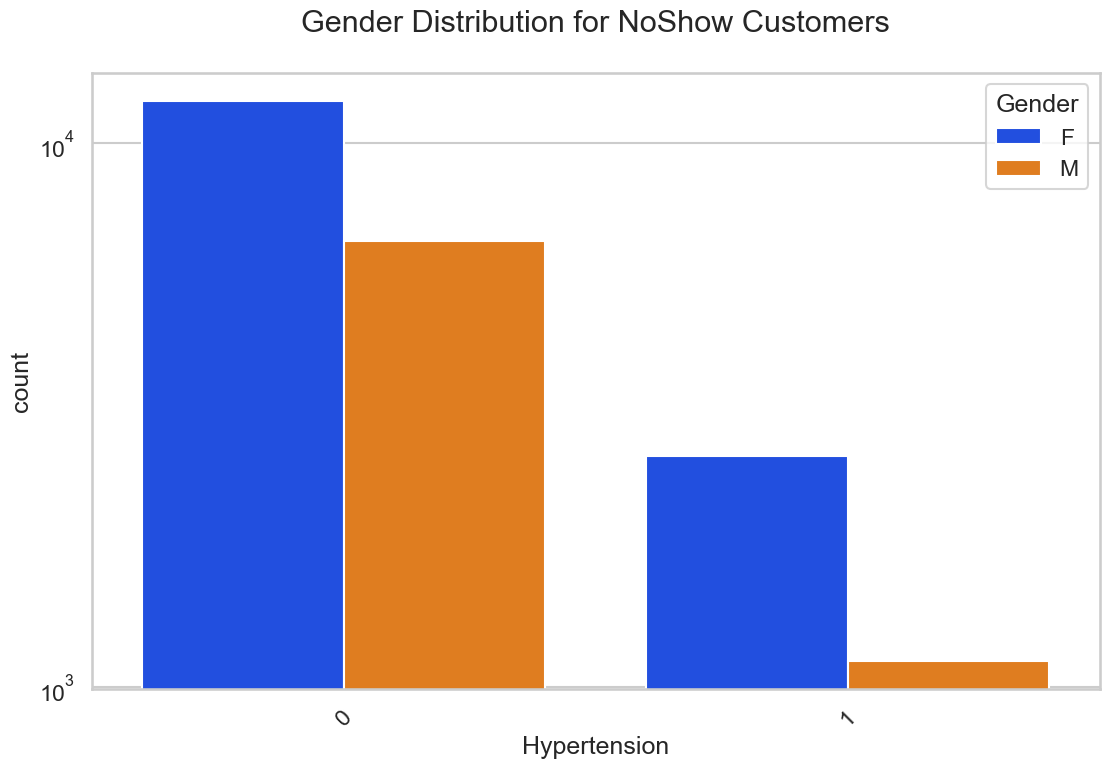

In [42]:
uniplot(new_df1_target1,col='Hypertension',title='Gender Distribution for NoShow Customers',hue='Gender')

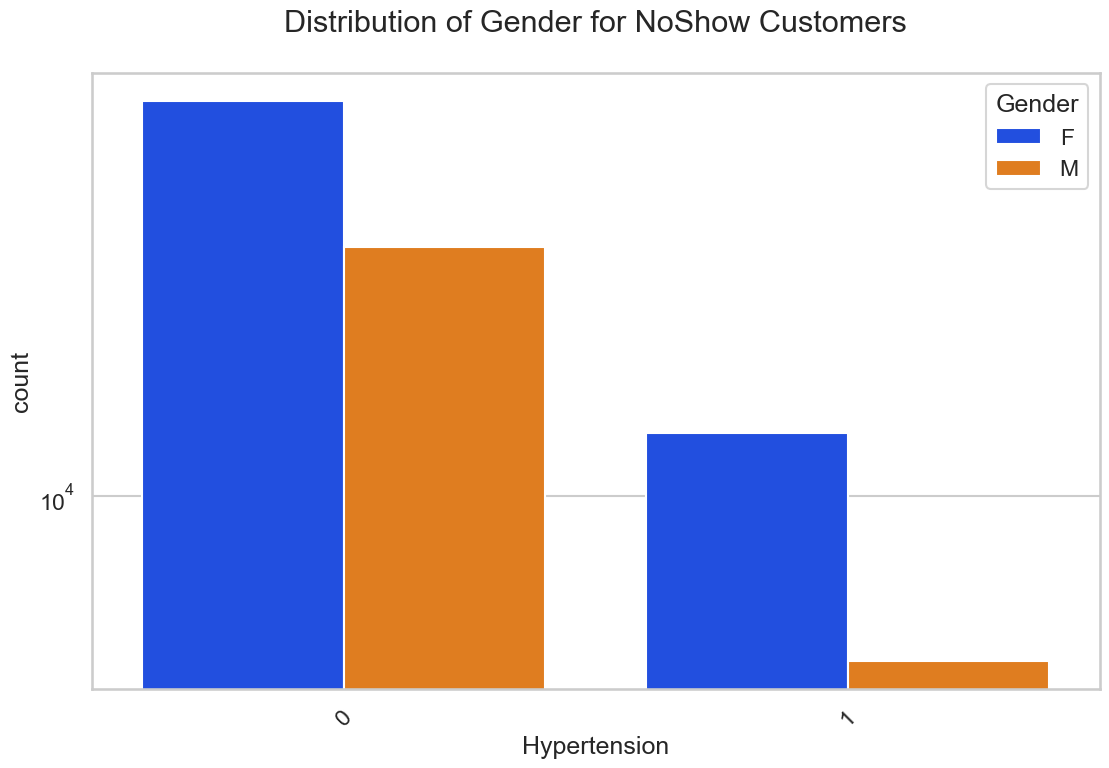

In [43]:
uniplot(new_df1_target0,col='Hypertension',title='Gender Distribution for NoShow Customers',hue='Gender') #Where no show = 1

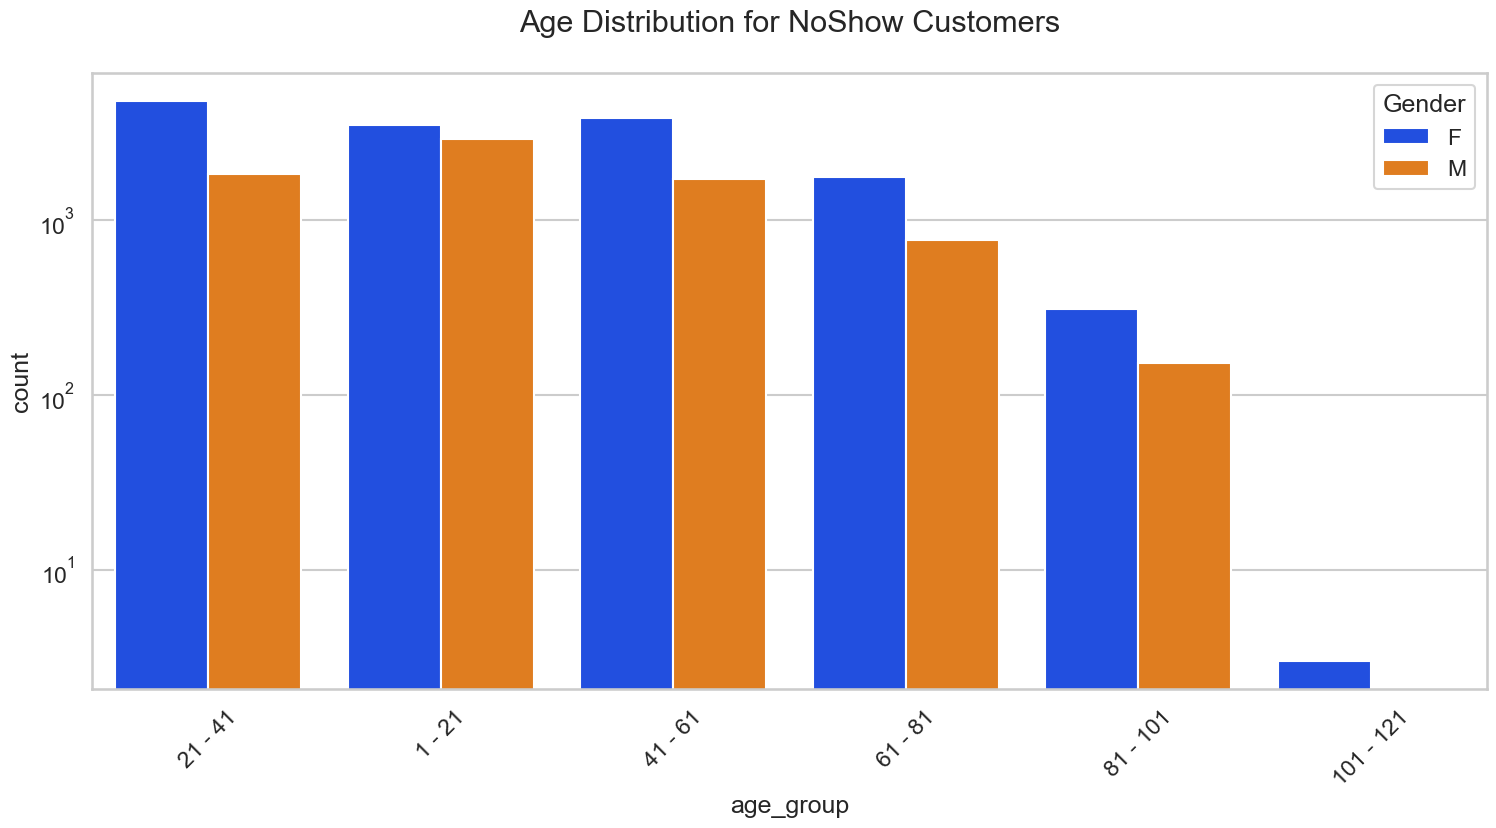

In [45]:
uniplot(new_df1_target1,col='age_group',title='Age Distribution for NoShow Customers',hue='Gender')

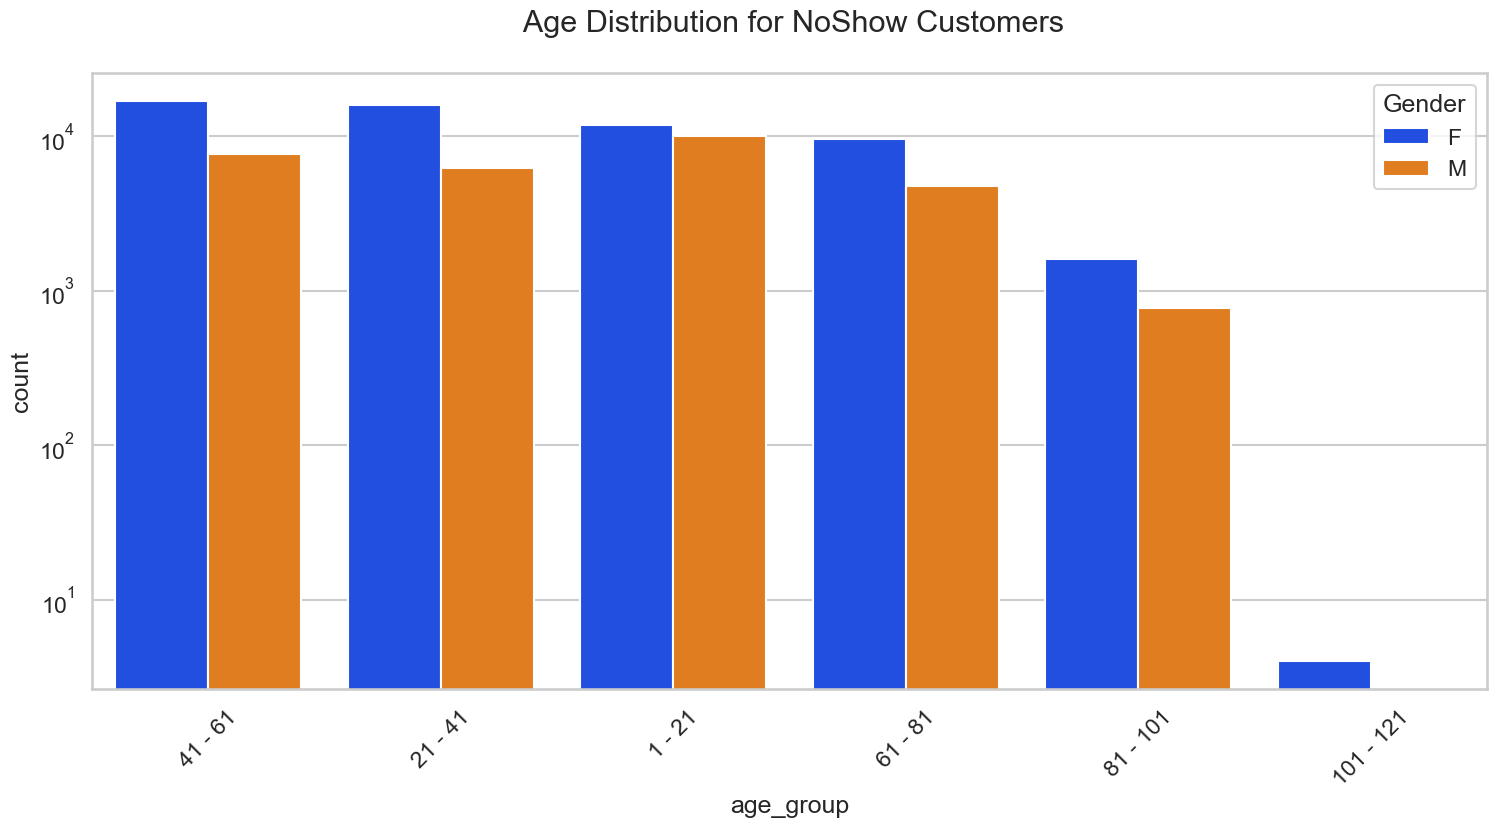

In [46]:
uniplot(new_df1_target0,col='age_group',title=' Age Distribution for NoShow Customers',hue='Gender')